<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects%20for%20Beginners/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from xgboost import XGBClassifier

# Data Exploration and Pre-Processing

In [ ]:
#configure the path for kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 79% 52.0M/66.0M [00:00<00:00, 142MB/s]
100% 66.0M/66.0M [00:00<00:00, 143MB/s]


In [ ]:
#extract the compressed dataset
dataset = "/content/creditcardfraud.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

creditcard.csv	creditcardfraud.zip  kaggle.json  sample_data


In [ ]:
#load dataset
dataset = pd.read_csv("/content/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataset.shape

(294696, 31)

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294696 entries, 0 to 294695
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    294696 non-null  float64
 1   V1      294696 non-null  float64
 2   V2      294696 non-null  float64
 3   V3      294695 non-null  float64
 4   V4      294695 non-null  float64
 5   V5      294695 non-null  float64
 6   V6      294695 non-null  float64
 7   V7      294695 non-null  float64
 8   V8      294695 non-null  float64
 9   V9      294695 non-null  float64
 10  V10     294695 non-null  float64
 11  V11     294695 non-null  float64
 12  V12     294695 non-null  float64
 13  V13     294695 non-null  float64
 14  V14     294695 non-null  float64
 15  V15     294695 non-null  float64
 16  V16     294695 non-null  float64
 17  V17     294695 non-null  float64
 18  V18     294695 non-null  float64
 19  V19     294695 non-null  float64
 20  V20     294695 non-null  float64
 21  V21     29

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,294696.000000,294696.000000,294696.000000,294695.000000,294695.000000,294695.000000,294695.000000,294695.000000,294695.000000,294695.000000,...,294695.000000,294695.000000,294694.000000,294694.000000,294694.000000,294694.000000,294694.000000,294694.000000,294694.000000,294694.000000
mean,95881.044972,0.009769,-0.008590,-0.023558,-0.004773,0.009718,-0.000393,0.004939,-0.002243,-0.001783,...,0.002266,0.005331,0.000881,-0.000884,-0.004138,-0.001276,-0.000089,0.000032,89.013009,0.001693
std,47035.096713,1.963100,1.654586,1.517280,1.420796,1.380795,1.333798,1.236499,1.186177,1.096200,...,0.732176,0.728426,0.629993,0.606566,0.524199,0.482179,0.403840,0.331584,250.956190,0.041115
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,55230.000000,-0.916240,-0.606529,-0.925919,-0.854738,-0.684595,-0.770827,-0.552202,-0.211261,-0.644325,...,-0.227715,-0.540513,-0.161782,-0.356224,-0.321575,-0.327606,-0.071135,-0.053585,5.852500,0.000000
50%,88433.500000,0.023691,0.060122,0.154947,-0.026367,-0.044845,-0.275731,0.043435,0.020117,-0.050722,...,-0.027049,0.012641,-0.010079,0.039902,0.010252,-0.053309,0.000967,0.010378,22.400000,0.000000
75%,138275.000000,1.335930,0.799087,1.009744,0.735505,0.623192,0.399619,0.576082,0.325071,0.595956,...,0.189737,0.538413,0.149987,0.441571,0.348279,0.239743,0.090829,0.078256,78.000000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
#dealing with missing values
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       2
V24       2
V25       2
V26       2
V27       2
V28       2
Amount    2
Class     2
dtype: int64

In [ ]:
# remove all rows with null values fromthe dataset
dataset = dataset.dropna()
dataset.isnull().values.any()

False

In [ ]:
dataset.shape

(294694, 31)

In [ ]:
dataset.select_dtypes(include="object").columns

Index([], dtype='object')

<Axes: xlabel='Class', ylabel='count'>

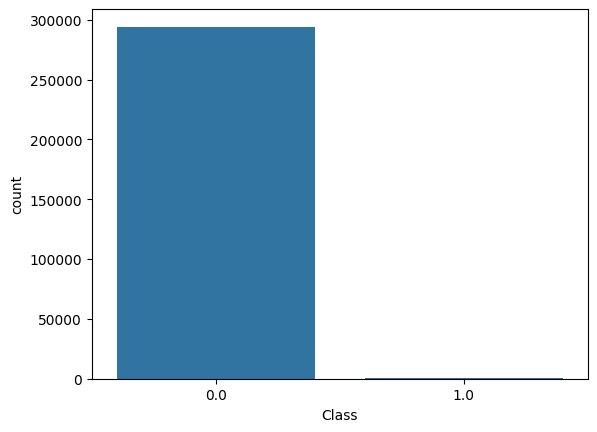

In [ ]:
sns.countplot(data=dataset, x="Class")

In [ ]:
(dataset.Class == 0).sum()

294195

In [ ]:
(dataset.Class == 1).sum()

499

<Axes: title={'center': 'Correlated with class'}>

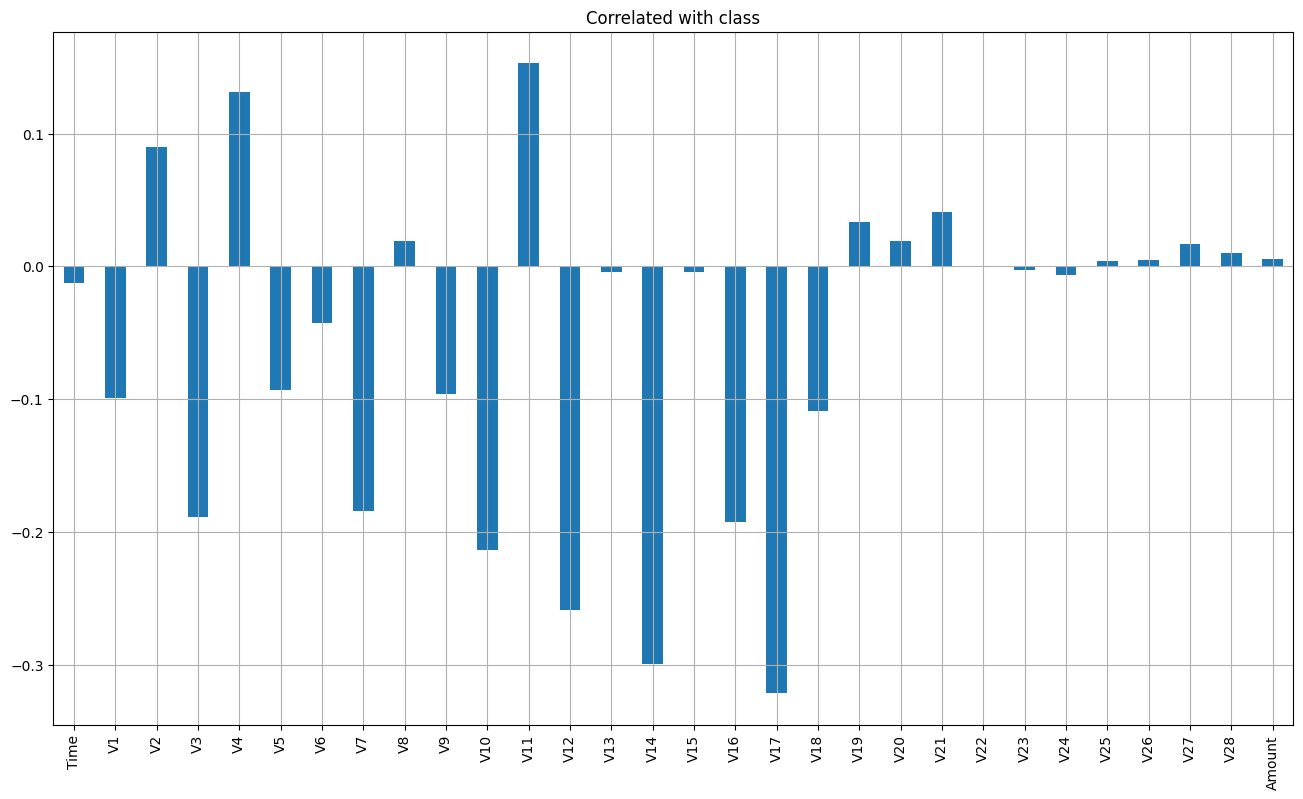

In [ ]:
data = dataset.drop(columns="Class")
data.corrwith(dataset["Class"]).plot.bar(
    figsize=(16, 9), title="Correlated with class", grid=True
)

<Axes: >

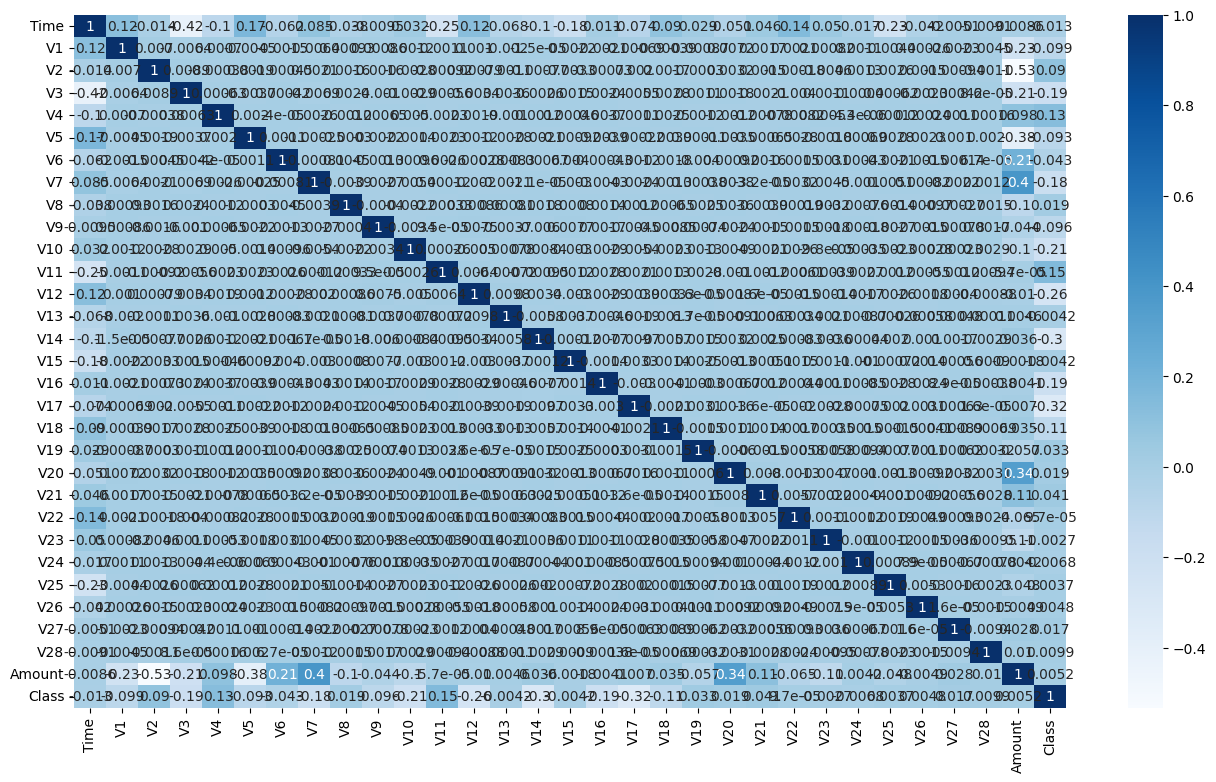

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True, cmap="Blues")

In [ ]:
#Separate features and target variables
X = dataset.drop(columns="Class")
y = dataset["Class"]

In [ ]:
#split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(294694, 30) (235755, 30) (58939, 30)


In [ ]:
#future scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.62339366  0.64901754  0.82181486 ...  0.11096876  0.28451853
  -0.34575581]
 [ 0.27470677 -0.34864565  0.58590567 ...  0.78820108  0.41163434
  -0.33850827]
 [ 0.51167921  1.11846301 -0.43823278 ... -0.11055814 -0.19055138
  -0.31461094]
 ...
 [-0.6460445  -0.41032382  0.12859041 ... -0.054289    0.15240788
  -0.05405179]
 [ 0.82685553  1.01983422 -0.02852274 ... -0.02386398 -0.18503781
  -0.30023338]
 [-0.59980702  0.65376096 -0.66494887 ...  0.19249013  0.08309447
  -0.34575581]]


# Building the models

In [ ]:
#logistic regression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#check model accuracy
y_pred = lr_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

results = pd.DataFrame([["Logistic Regression", acc, f1, prec, rec]],
                      columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999253,0.725,0.892308,0.610526


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58837     7]
 [   37    58]]


In [ ]:
#random forest
rmf_classifier = RandomForestClassifier(random_state=0)
rmf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rmf_y_pred = rmf_classifier.predict(X_test)

rmf_acc = accuracy_score(y_test, rmf_y_pred)
rmf_f1 = f1_score(y_test, rmf_y_pred)
rmf_prec = precision_score(y_test, rmf_y_pred)
rmf_rec = recall_score(y_test, rmf_y_pred)

model_results = pd.DataFrame([["Random Forest", rmf_acc, rmf_f1, rmf_prec, rmf_rec]],
                      columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999253,0.725000,0.892308,0.610526
1,Random Forest,0.999508,0.830409,0.934211,0.747368


In [ ]:
rmf_cm = confusion_matrix(y_test, rmf_y_pred)
print(rmf_cm)

[[58839     5]
 [   24    71]]


In [ ]:
#XGBoost
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
xgb_y_pred = xgb_classifier.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_prec = precision_score(y_test, xgb_y_pred)
xgb_rec = recall_score(y_test, xgb_y_pred)

model_results = pd.DataFrame([["XGBClassifier", xgb_acc, xgb_f1, xgb_prec, xgb_rec]],
                      columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999253,0.725000,0.892308,0.610526
1,Random Forest,0.999508,0.830409,0.934211,0.747368
2,XGBClassifier,0.999491,0.821429,0.945205,0.726316


In [ ]:
#Predicting a single Observation with logistic regression
single_obs = [[]]
lr_classifier.predict(sc.transform(single_obs))